# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = np.shape(x_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(x_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(x_train)[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

18


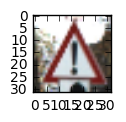

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(x_train))
image = x_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])


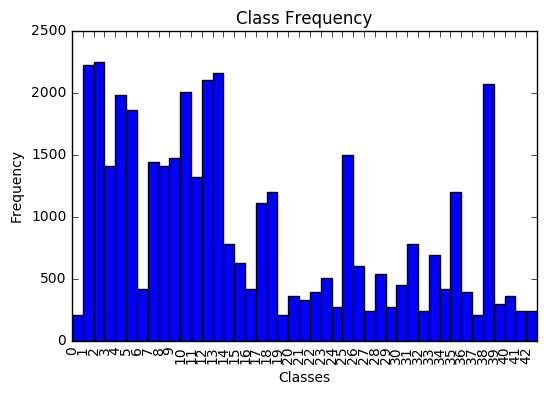

In [4]:
# Count frequency of each class in the train set
global dict_classes_count

unique, counts = np.unique(y_train, return_counts=True)
dict_classes_count = dict(zip(unique, counts))


plt.bar(range(len(dict_classes_count)), dict_classes_count.values(), 1)
plt.xticks(range(len(dict_classes_count)), dict_classes_count.keys(), rotation=90 )
plt.title('Class Frequency')
plt.axis('auto')
plt.xlabel('Classes')
plt.ylabel('Frequency')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Shuffle the data
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
x_train, y_train = shuffle(x_train, y_train)

# Grayscale all images in trainset
import cv2
x_train_gray = []
for z in range(np.shape(x_train)[0]):
    x_train_gray.append(cv2.cvtColor(x_train[z],cv2.COLOR_BGR2GRAY))

# Plot Grayscaled image
#index = random.randint(0, len(x_train_gray))
#image = x_train_gray[index].squeeze()
#plt.figure(figsize=(1,1))
#plt.imshow(image, cmap='gray')
#print(y_train[index])

print("Done")


Done


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I shuffled the image set and then grayscaled the images as i felt color would not be needed for this kind of classification. 

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# dict_classes_count is global dict of counts of classes in original training set
# counts is values in dict_classes_counts
from scipy import average

# Rotate image
def rotate_random(img):
    # Rotate randomly between -15 to 15
    rotation = random.randint(-15, 15)
    r_m = cv2.getRotationMatrix2D((16,16),rotation,1)
    r_i = cv2.warpAffine(img,r_m,(32,32))
    return r_i

def perspective_transform(img):
    low_rand = random.randint(0, 5)
    high_rand = random.randint(27, 32)
    
    pts1 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    pts2 = np.float32([[0,0],[high_rand,low_rand],[low_rand,32],[32,high_rand]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    return cv2.warpPerspective(img,M,(32,32))

avg = average(counts)
new_x_train_gray = x_train_gray
new_y_train = y_train

# random rotate all images which class is below average 3x times
for itr in range(0, 3):
    for key in dict_classes_count:
        if dict_classes_count[key] <= avg:
            add_x = []
            add_y = []
            for t in range(np.shape(x_train_gray)[0]):
                if y_train[t] == key:
                    add_x.append(rotate_random(x_train_gray[key]))
                    add_y.append(key)
            if len(add_y) > 0:
                new_x_train_gray = np.append(new_x_train_gray, add_x, axis=0)
                new_y_train = np.append(new_y_train, add_y, axis=0)


# Perspective transform all images a little bit and double the dataset in size
trans_x = []
trans_y = []
counter = np.shape(new_x_train_gray)[0]
for u in range(counter):
    trans_x.append(perspective_transform(new_x_train_gray[u]))
    trans_y.append(new_y_train[u])

new_x_train_gray = np.append(new_x_train_gray, trans_x, axis=0)
new_y_train = np.append(new_y_train, trans_y, axis=0)
    
print(np.shape(new_x_train_gray))
print(np.shape(new_y_train))

print("Done")


(141412, 32, 32)
(141412,)
Done


([], <a list of 0 Text yticklabel objects>)

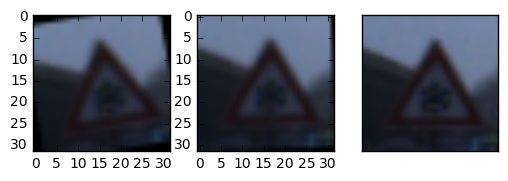

In [8]:
# TEST augmentation
norm = x_train[555]
rot = rotate_random(norm)
trans = perspective_transform(norm)

plt.subplot(1,3,1)
plt.imshow(rot)
plt.subplot(1,3,2)
plt.imshow(trans)
plt.subplot(1,3,3)
plt.imshow(norm)
plt.xticks(np.array([]))
plt.yticks(np.array([]))





Image shape updated: (32, 32)
Train set: (113129, 32, 32, 1)


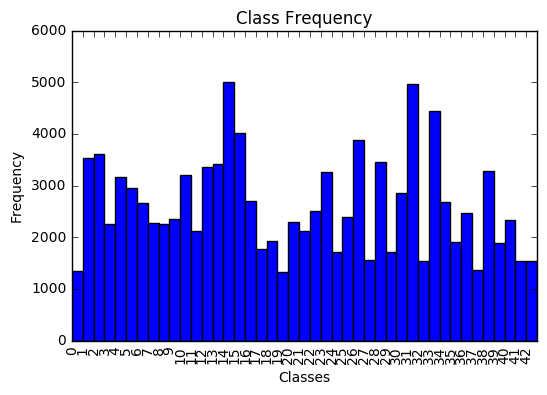

In [9]:
### Get the data ready for training! Splitting into training and validation set. Normalize the data and reshape the sets.

# Split the training set to get validation set.
from sklearn.model_selection import train_test_split
x_train_gray, x_validation_gray, y_train, y_validation = train_test_split(new_x_train_gray, new_y_train, test_size=0.2, random_state=0)
print("Image shape updated: {}".format(x_train_gray[0].shape))

#### normalize the train and validation sets
x_train_gray = (np.array(x_train_gray) - 128.0)/128.0
x_validation_gray = (np.array(x_validation_gray) - 128.0)/128.0

# Reshape training set and validation set
x_train_gray = np.reshape(x_train_gray, (np.shape(x_train_gray)[0],32,32,1))
x_validation_gray = np.reshape(x_validation_gray, (np.shape(x_validation_gray)[0],32,32,1))


# Print Test and validation data
print("Train set: {}".format(np.shape(x_train_gray)))

# Count frequency of each class in the train set
u, c = np.unique(y_train, return_counts=True)
new_classes_count = dict(zip(u, c))

plt.bar(range(len(new_classes_count)), new_classes_count.values(), 1)
plt.xticks(range(len(new_classes_count)), new_classes_count.keys(), rotation=90 )
plt.title('Class Frequency')
plt.axis('auto')
plt.xlabel('Classes')
plt.ylabel('Frequency')

plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I started with checking the count of samples per class and all the classes below average I boosted up with random rotation from -15 degrees to +15 degrees. I then took the whole dataset through a perspective transformation image by image and added them to the dataset and by that double up the number of samples.

So now I got a dataset with different perspective and some rotation hoping for better training and accuracy

I split the training set to 80/20 where 20% is the validation set. and normalized the sets


In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)

def ClassifySigns(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    #normalize to prevent neurons from saturating when inputs may have varying scale, and to aid generalization.
    #conv1 = tf.nn.l2_normalize(conv1, [0, 0, 0, 0], epsilon=1e-5)
    
    # Dropout
    #conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)

    # Pooling. Input = 28x28x16. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 12x12x48.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    #normalize to prevent neurons from saturating when inputs may have varying scale, and to aid generalization.
    #conv2 = tf.nn.l2_normalize(conv2, [0, 0, 0, 0], epsilon=1e-5)
    
    # Dropout
    #conv2 = tf.nn.dropout(conv2, keep_prob=keep_prob)
    
    #  Pooling. Input = 12x12x48. Output = 6x6x48.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #  Layer 3: Convolutional. Output = 4x4x512.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 48, 512), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(512))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    #normalize to prevent neurons from saturating when inputs may have varying scale, and to aid generalization.
    #conv3 = tf.nn.l2_normalize(conv3, [0, 0, 0, 0], epsilon=1e-5)
    
    # Dropout
    #conv3 = tf.nn.dropout(conv3, keep_prob=keep_prob)
    
    #  Pooling. Input = 4x4x512. Output = 1x1x512.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
     
    # Flatten. Input = 1x1x512. Output = 512.
    fc0 = flatten(conv3)
    
    #  Layer 4: Fully Connected. Input = 512. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    
    #normalize to prevent neurons from saturating when inputs may have varying scale, and to aid generalization.
    #fc1 = tf.nn.l2_normalize(fc1, [0, 0, 0, 0], epsilon=1e-12)
    
    # Layer 5: Fully Connected. Input = 256. Output = 88.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 88), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(88))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)
    
    #normalize to prevent neurons from saturating when inputs may have varying scale, and to aid generalization.
    #fc2 = tf.nn.l2_normalize(fc2, [0, 0, 0, 0], epsilon=1e-12)

    # Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(88, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture is built on the LeNet architechture.

3 Layers of Convolution with Activation Relu and max pooling
then 2 fully connected with activation Relu, dropout and output layer with activation softmax.

---------------------------------

Layer 1: 
Convolution - Input = 32x32x1. Output = 28x28x16.
Activation - Relu.
Pooling. Input = 28x28x16. Output = 14x14x48.

Layer 2: 
Convolution - Input = 14x14x48. Output = 12x12x48.
Activation - Relu.
Pooling. Input = 12x12x48. Output = 6x6x48.

Layer 3:
Convolution - Input = 6x6x48. Output = 4x4x512.
Activation - Relu.
Pooling. Input = 4x4x512. Output = 1x1x512.

Flatten. Input = 1x1x512. Output = 512.

Layer 4: 
Fully Connected. Input = 512. Output = 256.
Activation - Relu.
Dropout

Layer 5: 
Fully Connected. Input = 512. Output = 88.
Activation - Relu.
Dropout

Output layer:
Fully Connected. Input = 128. Output = 43.
Activation - Softmax


In [11]:
### Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline
rate = 0.001

logits = ClassifySigns(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
### Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    print("Examples evaluated: " + str(num_examples))
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 25
BATCH_SIZE = 128  #128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train_gray)
    print("Examples to be trained: " + str(num_examples))
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train_gray, y_train = shuffle(x_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
            
        validation_accuracy = evaluate(x_validation_gray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_signs.ckpt')
    print("Model saved")

Examples to be trained: 113129
Training...

Examples evaluated: 28283
EPOCH 1 ...
Validation Accuracy = 0.938

Examples evaluated: 28283
EPOCH 2 ...
Validation Accuracy = 0.974

Examples evaluated: 28283
EPOCH 3 ...
Validation Accuracy = 0.982

Examples evaluated: 28283
EPOCH 4 ...
Validation Accuracy = 0.986

Examples evaluated: 28283
EPOCH 5 ...
Validation Accuracy = 0.988

Examples evaluated: 28283
EPOCH 6 ...
Validation Accuracy = 0.990

Examples evaluated: 28283
EPOCH 7 ...
Validation Accuracy = 0.989

Examples evaluated: 28283
EPOCH 8 ...
Validation Accuracy = 0.986

Examples evaluated: 28283
EPOCH 9 ...
Validation Accuracy = 0.993

Examples evaluated: 28283
EPOCH 10 ...
Validation Accuracy = 0.993

Examples evaluated: 28283
EPOCH 11 ...
Validation Accuracy = 0.992

Examples evaluated: 28283
EPOCH 12 ...
Validation Accuracy = 0.993

Examples evaluated: 28283
EPOCH 13 ...
Validation Accuracy = 0.993

Examples evaluated: 28283
EPOCH 14 ...
Validation Accuracy = 0.989

Examples eval

### Test Model with Test dataset

In [14]:
# grayscale test set
x_test_gray = []
for z in range(np.shape(x_test)[0]):
    x_test_gray.append(cv2.cvtColor(x_test[z],cv2.COLOR_BGR2GRAY))

# reshape test set
x_test_gray = np.reshape(x_test_gray, (np.shape(x_test_gray)[0],32,32,1))

# normalize test set
x_test_gray = (np.array(x_test_gray) - 128.0)/128.0

# Shuffle test set
x_test_gray, y_test = shuffle(x_test_gray, y_test)


In [15]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('traffic_signs.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    test_accuracy = evaluate(x_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Examples evaluated: 12630
Test Accuracy = 0.946


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I got Adam optimizer with 0.001 learning rate 
25 EPOCHS and Batch size of 128


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with LeNet and had issues with the training data. I boosted up the data with some transformation and got significantly better evaluation accuracy.
This has been alot of trials and errors where it seemed that I had been overfitting and my test data had significantly lower accuracy then evaluation. I was trying to prevent overfitting with batch normalization but could not get it to give me any better result. I was not satisfied with the result so I  trialed the parameters in the algorithm and added one convolution layer and fully connected layer. I managed to get my test set up to 95.5%. 




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.